In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#downcasting the data so that memory requirement is reduced. I am following the codebook by Konstantin Yakovlev from Kaggle

In [4]:
df = pd.read_csv('sales_train.csv')

In [5]:
def downcast(df):
    #finding floating point columns
    float_cols = [c for c in df if df[c].dtype == 'float64']
    #finding integer columns
    int_cols = [c for c in df if df[c].dtype in ['int32','int64']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [6]:
sales_train = downcast(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: float32(2), int16(3), object(1)
memory usage: 61.6+ MB
None


In [7]:
# We will find out the outdated products (for which no sales in last 6 months) and make no prediction in test sets
# instead we put 0 as a prediciton. First we will see if there is any outdated (or closed) shops in test data

In [8]:
test = pd.read_csv('test.csv')

In [9]:
test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [10]:
shops_test = test['shop_id'].unique() #list of shops in test data

In [11]:
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [12]:
tvs = sales_train.pivot_table(index='date_block_num',columns='shop_id',values='item_cnt_day',aggfunc=sum)

In [13]:
tvs.head(6)

shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
date_block_num,,,,,,,,,,,,,,,,,,,,,
0,5578.0,2947.0,1146.0,767.0,2114.0,NaN,3686.0,2495.0,1463.0,NaN,...,3406.0,2748.0,1812.0,2055.0,9386.0,NaN,3238.0,NaN,NaN,2017.0
1,6127.0,3364.0,488.0,798.0,2025.0,877.0,4007.0,2513.0,1156.0,NaN,...,3054.0,2284.0,1737.0,1906.0,8075.0,NaN,2655.0,NaN,NaN,1897.0
2,NaN,NaN,753.0,959.0,2060.0,1355.0,4519.0,2460.0,977.0,NaN,...,3610.0,2605.0,2034.0,2365.0,9488.0,NaN,3099.0,6586.0,3773.0,2028.0
3,NaN,NaN,583.0,647.0,285.0,1008.0,3168.0,1540.0,-1.0,NaN,...,2740.0,1945.0,1446.0,1515.0,6726.0,NaN,2153.0,5493.0,2831.0,1388.0
4,NaN,NaN,553.0,710.0,1211.0,1110.0,3022.0,1647.0,NaN,NaN,...,2839.0,2243.0,1482.0,1767.0,7006.0,852.0,2140.0,5233.0,2308.0,1374.0
5,NaN,NaN,832.0,784.0,1464.0,1393.0,3847.0,2085.0,NaN,NaN,...,3761.0,2200.0,1815.0,2125.0,8101.0,728.0,3105.0,5987.0,2972.0,1707.0


In [14]:
shops_train = np.sort(sales_train['shop_id'].unique())
shops_train[tvs[tvs.index>27].isna().sum()==6]

array([ 0,  1,  8, 11, 13, 17, 23, 30, 32, 33, 40, 43, 54])

In [15]:
outdated = np.sort(shops_train[tvs[tvs.index>27].isna().sum()==6]) # list of outdated shop_id

In [16]:
print('Number of outdated shops in test data: {}'.format(np.isin(shops_test,outdated).sum()))

Number of outdated shops in test data: 0


In [17]:
# Now will find the outdated products which is not being sold for last 8 months

In [18]:
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [19]:
tvs = sales_train.pivot_table(index='date_block_num',columns='item_id',values='item_cnt_day',aggfunc=sum)

In [20]:
tvs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Columns: 21807 entries, 0 to 22169
dtypes: float32(21807)
memory usage: 2.8 MB


In [21]:
products_train = np.sort(sales_train['item_id'].unique())

In [22]:
out_month = 8 # out_month is the number of last months for which we will check if there is any sales

In [23]:
outdated_products = products_train[tvs[tvs.index>(33-out_month)].isna().sum()==out_month] #list of outdated products

In [24]:
print('Number of outdated products in the training set:{}'.format(len(outdated_products)))

Number of outdated products in the training set:11617


In [25]:
products_test = np.sort(test['item_id'].unique())

In [26]:
print('Number of outdated products in the test set:{}'.format(np.isin(outdated_products,products_test).sum()))

Number of outdated products in the test set:137


In [27]:
#outlier detection

In [28]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

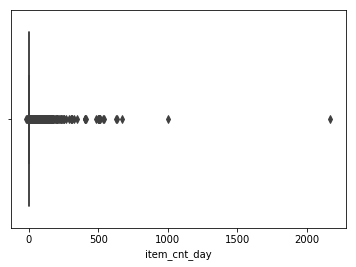

In [30]:
sns.boxplot(sales_train['item_cnt_day'])

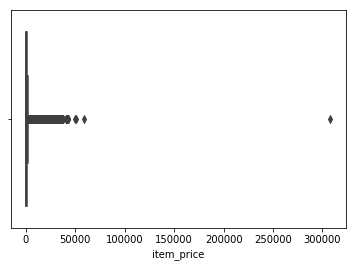

In [31]:
sns.boxplot(sales_train['item_price'])

In [32]:
# from the box plots, looks like 'item_cnt_day' above 600 and 'item_price' above 50000 can be considered
# as outliers. We will remove those

In [33]:
print('Size of dataset before outliers: {}'.format(sales_train.shape))
sales_train = sales_train[sales_train['item_price']<50000]
sales_train = sales_train[sales_train['item_cnt_day']<600]
sales_train = sales_train[sales_train['item_price']>0]
print('Size of dataset after removing outliers: {}'.format(sales_train.shape))

Size of dataset before outliers: (2935849, 6)
Size of dataset after removing outliers: (2935840, 6)


In [34]:
sales_train.shape

(2935840, 6)

In [35]:
shops = pd.read_csv('shops.csv')

In [36]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [37]:
np.isin(test['item_id'],outdated_products).sum()

5754

In [38]:
test.shape

(214200, 3)

In [39]:
sample_submission = pd.read_csv('sample_submission.csv')

In [40]:
sample_submission.shape

(214200, 2)

In [41]:
sales_train.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2935839, 2935840, 2935841, 2935842, 2935843, 2935844, 2935845,
            2935846, 2935847, 2935848],
           dtype='int64', length=2935840)

In [42]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935840 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: float32(2), int16(3), object(1)
memory usage: 84.0+ MB


In [43]:
sales_train.index = sales_train.index.astype(np.int32)

In [44]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935840 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: float32(2), int16(3), object(1)
memory usage: 84.0+ MB


In [45]:
sales_train.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2935839, 2935840, 2935841, 2935842, 2935843, 2935844, 2935845,
            2935846, 2935847, 2935848],
           dtype='int64', length=2935840)

In [46]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y', dayfirst= True)

In [47]:
sales_train.head(8)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.000000,1.0
1,2013-01-03,0,25,2552,899.000000,1.0
2,2013-01-05,0,25,2552,899.000000,-1.0
3,2013-01-06,0,25,2554,1709.050049,1.0
4,2013-01-15,0,25,2555,1099.000000,1.0
5,2013-01-10,0,25,2564,349.000000,1.0
6,2013-01-02,0,25,2565,549.000000,1.0
7,2013-01-04,0,25,2572,239.000000,1.0


In [48]:
import datetime

In [49]:
weekdays = []
for i in sales_train.date:
    weekdays.append(datetime.datetime.weekday(i))

    

In [50]:
weekdays = pd.DataFrame(weekdays)

In [51]:
weekdays = pd.DataFrame(weekdays)

In [52]:
weekdays.rename(columns={0:'weekdays'})

,weekdays
0,2
1,3
2,5
3,6
4,1
5,3
6,2
7,4
8,4
9,3


In [53]:
sales_train = pd.merge(weekdays,sales_train, left_index= True, right_index= True, how = 'left')

In [54]:
sales_train.head(5)

,0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2,2013-01-02,0.0,59.0,22154.0,999.000000,1.0
1,3,2013-01-03,0.0,25.0,2552.0,899.000000,1.0
2,5,2013-01-05,0.0,25.0,2552.0,899.000000,-1.0
3,6,2013-01-06,0.0,25.0,2554.0,1709.050049,1.0
4,1,2013-01-15,0.0,25.0,2555.0,1099.000000,1.0


In [55]:
sales_train.rename(columns={0:'weekdays'})

,weekdays,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2,2013-01-02,0.0,59.0,22154.0,999.000000,1.0
1,3,2013-01-03,0.0,25.0,2552.0,899.000000,1.0
2,5,2013-01-05,0.0,25.0,2552.0,899.000000,-1.0
3,6,2013-01-06,0.0,25.0,2554.0,1709.050049,1.0
4,1,2013-01-15,0.0,25.0,2555.0,1099.000000,1.0
5,3,2013-01-10,0.0,25.0,2564.0,349.000000,1.0
6,2,2013-01-02,0.0,25.0,2565.0,549.000000,1.0
7,4,2013-01-04,0.0,25.0,2572.0,239.000000,1.0
8,4,2013-01-11,0.0,25.0,2572.0,299.000000,1.0
9,3,2013-01-03,0.0,25.0,2573.0,299.000000,3.0


In [56]:
pd.to_datetime(df.date[1], dayfirst= True, format= '%d.%m.%Y')

Timestamp('2013-01-03 00:00:00')

In [57]:
test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [59]:
np.max(sales_train['item_id'])

22169.0

In [70]:
sales_train[sales_train['item_price'].isna()]

,0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,0,NaT,NaN,NaN,NaN,NaN,NaN
885138,1,NaT,NaN,NaN,NaN,NaN,NaN
1163158,3,NaT,NaN,NaN,NaN,NaN,NaN
1488135,2,NaT,NaN,NaN,NaN,NaN,NaN
2326930,4,NaT,NaN,NaN,NaN,NaN,NaN
2608040,2,NaT,NaN,NaN,NaN,NaN,NaN
2851091,0,NaT,NaN,NaN,NaN,NaN,NaN
2864235,6,NaT,NaN,NaN,NaN,NaN,NaN
2909818,3,NaT,NaN,NaN,NaN,NaN,NaN


In [81]:
sales_train = sales_train.dropna()

In [82]:
sales_train.isna().sum()

0                 0
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [83]:
sales_train.head(1)

,0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2,2013-01-02,0.0,59.0,22154.0,999.0,1.0


In [89]:
sales_train.shop_id = sales_train.shop_id.astype(np.int8)

In [90]:
sales_train.head(1)

,0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2,2013-01-02,0.0,59,22154.0,999.0,1.0


In [91]:
np.max(sales_train['item_id'])

22169.0

In [92]:
sales_train.item_id = sales_train.item_id.astype(np.int16)

In [106]:
sales_train.head(1)

,0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2,2013-01-02,0,59,22154,999,1


In [107]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935831 entries, 0 to 2935839
Data columns (total 7 columns):
0                 int64
date              datetime64[ns]
date_block_num    int8
shop_id           int8
item_id           int16
item_price        int16
item_cnt_day      int16
dtypes: datetime64[ns](1), int16(3), int64(1), int8(2)
memory usage: 89.6 MB


In [95]:
sales_train.date_block_num = sales_train.date_block_num.astype(np.int8)

In [103]:
np.max(sales_train['item_price'])

49782.0

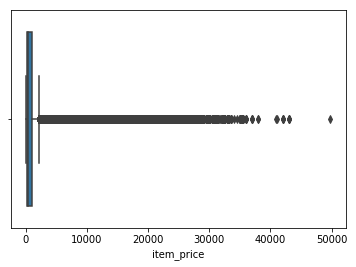

In [104]:
sns.boxplot(sales_train['item_price'])

In [105]:
sales_train.item_price = sales_train.item_price.astype(np.int16)

In [112]:
ts = sales_train.pivot_table(index=['shop_id','item_id'], columns = 'date_block_num', values = 'item_cnt_day', aggfunc= sum, fill_value = 0)

In [113]:
ts.shape

(424121, 34)

In [134]:
ts.reset_index()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,43,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,49,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
ts.index.shape

(424121,)

In [188]:
ts.index[424120]

(59, 22167)

In [185]:
ts.loc[ts.index[9],33]

0

In [175]:
ts.head()

date_block_num   0   1   2   3   4   5   6   7   8   9   ...  24  25  26  27  \
shop_id item_id                                          ...                   
0       30        0  31   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        31        0  11   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        32        6  10   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        33        3   3   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        35        1  14   0   0   0   0   0   0   0   0  ...   0   0   0   0   

date_block_num   28  29  30  31  32  33  
shop_id item_id                          
0       30        0   0   0   0   0   0  
        31        0   0   0   0   0   0  
        32        0   0   0   0   0   0  
        33        0   0   0   0   0   0  
        35        0   0   0   0   0   0  

[5 rows x 34 columns]

In [194]:
test = test.assign(Prediction='')

In [195]:
ts.loc[ts.index[9]]

date_block_num
0     0
1     2
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
Name: (0, 49), dtype: int64

In [ ]:
count = 0
for i in range(0,424121):
    shop = ts.index[i][0]
    product = ts.index[i][1]
    if ((test.shop_id== shop) & (test.item_id== product)).sum() == 1:
        test.loc[(test.shop_id== shop) & (test.item_id== product), 'Prediction'] = ts.loc[ts.index[i]][33]
        count = count + 1

print(count)


In [246]:
test.loc[(test.shop_id== 5) & (test.item_id== 5320), 'Prediction']= ts.loc[ts.index[1]][33]

In [253]:
shop = ts.index[0][0]
product = ts.index[0][1]
test.loc[(test.shop_id== shop) & (test.item_id== product), 'Prediction'] == ts.loc[ts.index[i]][33]

Series([], Name: Prediction, dtype: bool)

In [276]:
((test.shop_id== 59) & (test.item_id== 22087)).sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
214170    False
214171    False
214172    False
214173    False
214174    False
214175    False
214176    False
214177    False
214178    False
214179    False
214180    False
214181    False
214182    False
214183    False
214184    False
214185    False
214186    False
214187    False
214188    False
214189    False
214190    False
214191    False
214192    False
214193    False
214194    False
214195    False
214196    False
214197    False
214198    False
214199    Fa

In [260]:
test.loc[(test.shop_id== 59) & (test.item_id== 22087)]

,ID,shop_id,item_id,Prediction
148487,148487,59,22087,


AttributeError: 'MultiIndex' object has no attribute 'shop_id'

In [264]:
sales_train.shop_id.nunique()

60

In [265]:
sales_train.item_id.nunique()

21805

In [267]:
ts

date_block_num   0   1   2   3   4   5   6   7   8   9   ...  24  25  26  27  \
shop_id item_id                                          ...                   
0       30        0  31   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        31        0  11   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        32        6  10   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        33        3   3   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        35        1  14   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        36        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        40        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        42        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        43        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        49        0   2   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        51        2   3   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        57        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        59        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        61        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        75        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        85        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        88        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        95        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        96        1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        97        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        98       25   5   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        111       1   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        115       0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        136       0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        149       3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        151       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        152       0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        153       1   2   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        198       1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        199       0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
...              ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
59      22079     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22087     9   1   6   0   2  17  12   7  10   5  ...   4  10   5   2   
        22088     5   0   5   3   6   8   7   4   4   0  ...   6   3   4   3   
        22091     0   0   1   0   2   0   7   2   0   0  ...   1   0   1   0   
        22092     2   0   5   2   5   0   2   3   5   7  ...   3   0   3   0   
        22100     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22102     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22104     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22105     0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   
        22106     0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   
        22114     0   0   0   0   1   0   0   0   0   0  ...   0   0   0   1   
        22115     0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   
        22118     0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   
        22126     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22130     2   2   0   0   0   0   0   0   0   0  ...   0   0   0   0   
        22132     0   0   0   0   0   0   1   1   0   0  ...   0   0   0   0   
        22134     2   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   


In [274]:
test.head()

,ID,shop_id,item_id,Prediction
0,0,5,5037,
1,1,5,5320,0
2,2,5,5233,
3,3,5,5232,
4,4,5,5268,
